In [26]:
! pip install ing_theme_matplotlib
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)

In [23]:
from tech_core.wqb_utils import *
plt.style.use('dark_background')

In [2]:
am = AlphaManager()

Loading Data. This code will take ~1.92 minutes to run


In [3]:
class SimpleFunction:
    def __init__(self):
        pass

    def __call__(self, ticker, row):
        close_open_return = row['close'] / row['open'] - 1
        high_low_return = row['high'] / row['low'] - 1
        low_high_return = row['low'] / row['high'] - 1

        if close_open_return * 1.1 > high_low_return:
            return -1
        elif close_open_return * 1.1 < low_high_return:
            return 1
        else:
            return 0


In [21]:
class FunctionWithMemory:
    def __init__(self):
        self.memory = Memory(window=5)
    
    def __call__(self, ticker, row):
        df = self.memory.update(ticker, row)

        close_open_return = row['close'] / row['open'] - 1
        high_low_return = row['high'] / row['low'] - 1
        low_high_return = row['low'] / row['high'] - 1

        if close_open_return * 1.1 > high_low_return:
            return -df['volume'].mean()/row['volume']
        elif close_open_return * 1.1 < low_high_return:
            return df['volume'].mean()/row['volume']
        else:
            return 0

Sharpe (no inflation): 1.7259834795485032
Sharpe (normal): 0.15926938639245225
Max Drawdown: -0.814296246423154
Return to Drawdown: 3.228007421513391

Feedback
This strategy earn money even more than risk-free rate, but still not enough, try to improve it, your Sharpe is 0.15926938639245225, need to be more than 1


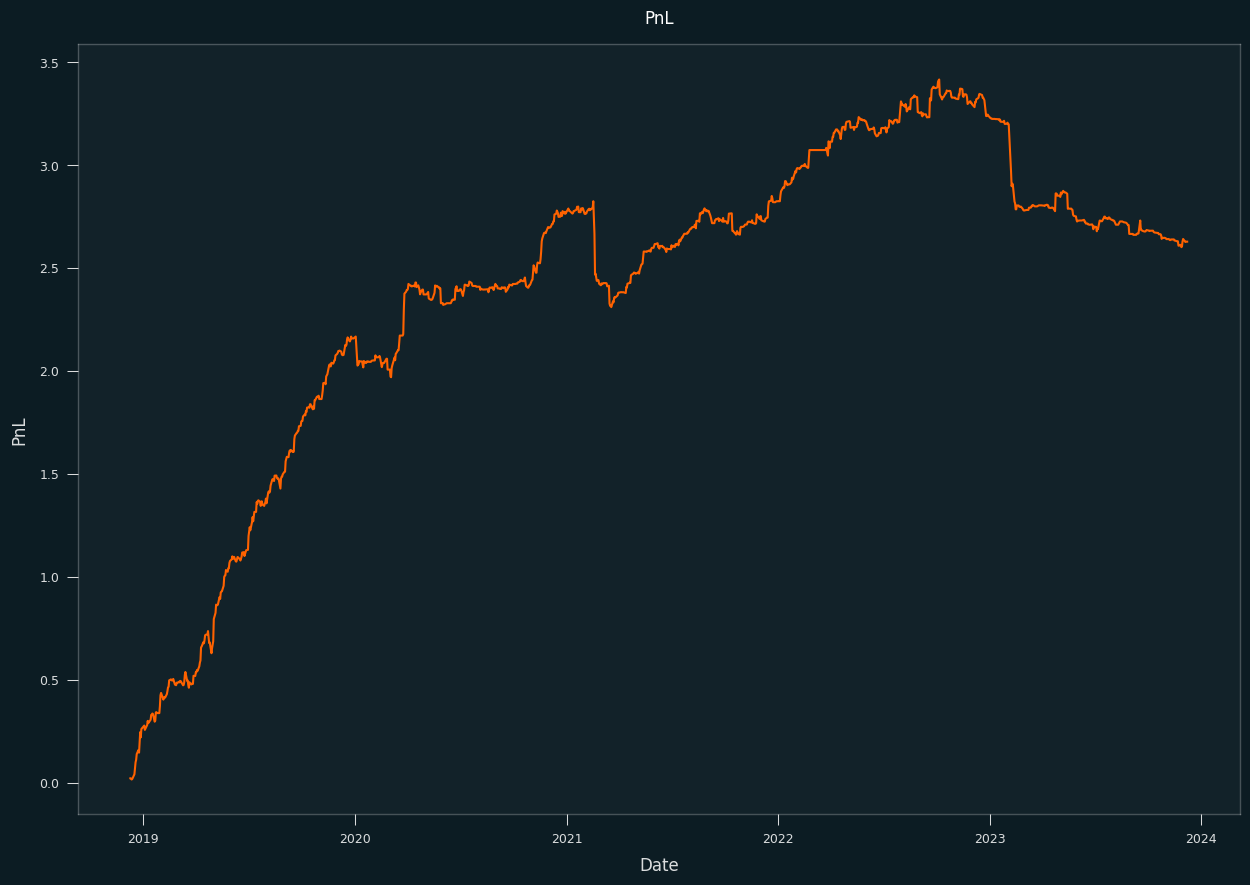

In [27]:
am.execute(Alpha('overnight', 'sector', SimpleFunction()))

Sharpe (no inflation): 1.1421878449205298
Sharpe (normal): 0.6643300393221842
Max Drawdown: -1.9551779160324774
Return to Drawdown: 7.692397052499852

Feedback
This strategy earn money even more than risk-free rate, but still not enough, try to improve it, your Sharpe is 0.6643300393221842, need to be more than 1


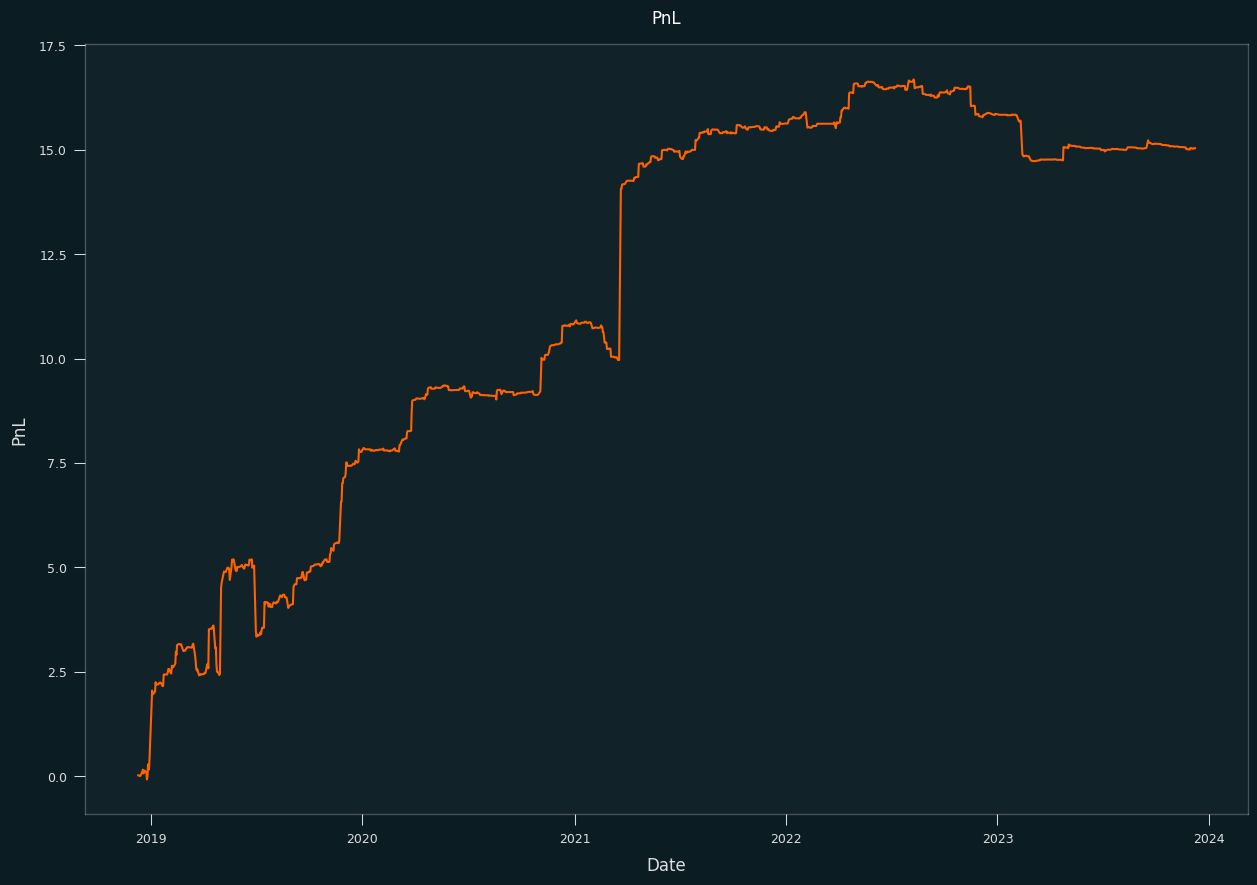

In [28]:
am.execute(Alpha('overnight', 'sector', FunctionWithMemory()))